# Assignment 6A
## Fix the network above:
1. Remove Dense Layer
2. Add layers required to reach RF
3. Fix kernel scaleup and down (1x1)
4. See if all dropouts are properly placed
* Follow the guidelines we discussed in the class (
Get accuracy more than the base accuracy in less number 100 epochs. Hint, you might want to use "padding='same',".
* Save File as Assignment 6A.

##Loading and Preprocessing the Data

### Loading the Cifar10 Datset and plotting 10 classes

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

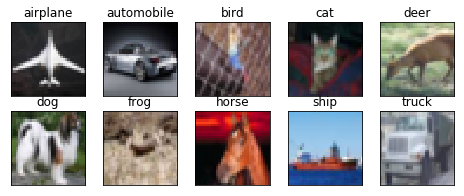

In [19]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Defining Functions to Plot Accuracy and Loss Graphs.

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

###**Type Conversion and Scalling:**
1. Convert the input data type to float32.
2. Normalise the input data within the range of 0 and 9.

###**One Hot Encoding of Labels:**
1. Convert the 1D class arrays of output data into 10 dimesional class matrices - basically one hot encoding.

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

#**Model Creation Using Keras**
The following code defines the architecture/model of our neural network in which we will add layers in the network using keras:
1.   **Initializing a sequential model**: Stack layers on top of one another, it also ensures that the input and output sizes of successive layers are compatible. 
2.   **Adding Convolution Layers**: While adding the first convolution layer we need to specify the input size as well. In the next convolution layers we do not need an input size since they will receive the input size from the preceeding layers.
3. **Adding Max Pooling Layers**: We add them to resuce the dimensions of image extracting the maximum out of the (2,2) pool and pass them forward.
4. **Adding Flatten Layer**: When finally we reach the output size of 1X1X10, we flatten the output channel-wise into output of shape 10 (1-dimension).
5. **Adding Softmax Layer**: This layer converts the last layer outuput into probabolity distribution of 10 classes.



## Basic Convolution Model Architecture

**1. Total params: 1,172,410**

**2. Trainable params: 1,172,410**

**3. Non-trainable params: 0**

##We are getting the validation accuracy = 82.96%
#### After 50 EPOCHS we get the following results:

loss: 0.3376 || acc: 0.8869 || val_loss: 0.5569 || **val_acc: 0.8296** ||


In [8]:
########################################
# Define the model
model = Sequential()
########################################

# All shapes are in the form [height, width, num_channels]

# INPUT SIZE : [32, 32, 3] | OUTPUT SIZE : [32, 32, 48] | GRF_of_input : [1, 1]
model.add(Convolution2D(48, (3, 3), padding='same', input_shape=(32, 32, 3))) # 32
model.add(Activation('relu'))

# INPUT SIZE : [32, 32, 48] | OUTPUT SIZE : [30, 30, 48] | GRF_of_input : [3, 3]
model.add(Convolution2D(48, (3, 3))) # 30
model.add(Activation('relu'))

########################################

# INPUT SIZE : [30, 30, 48] | OUTPUT SIZE : [15, 15, 48] | GRF_of_input : [5, 5]
model.add(MaxPooling2D(pool_size=(2, 2))) # 15
model.add(Dropout(0.25))
########################################

# The valid means there is no padding around input or feature map, while same means there are some padding around input or feature map, making the output feature map's size same as the input's]
# INPUT SIZE : [15, 15, 48] | OUTPUT SIZE : [15, 15, 96] | GRF_of_input : [7, 7]
model.add(Convolution2D(96, (3, 3), padding='same')) # 15
model.add(Activation('relu'))

# INPUT SIZE : [15, 15, 96] | OUTPUT SIZE : [13, 13, 96] | GRF_of_input : [11, 11]
model.add(Convolution2D(96, (3, 3))) # 13
model.add(Activation('relu'))
########################################

# INPUT SIZE : [13, 13, 96] | OUTPUT SIZE : [6, 6, 96] | GRF_of_input : [15, 15]
model.add(MaxPooling2D(pool_size=(2, 2))) # 6
model.add(Dropout(0.25))
########################################

# INPUT SIZE : [6, 6, 96] | OUTPUT SIZE : [6, 6, 192] | GRF_of_input : [19, 19]
model.add(Convolution2D(192, (3, 3), padding='same')) # 6
model.add(Activation('relu'))

# INPUT SIZE : [6, 6, 192] | OUTPUT SIZE : [4, 4, 192] | GRF_of_input : [27, 27]
model.add(Convolution2D(192, (3, 3))) # 4
model.add(Activation('relu'))

########################################
# INPUT SIZE : [4, 4, 192] | OUTPUT SIZE : [2, 2, 192] | GRF_of_input : [35, 35]
model.add(MaxPooling2D(pool_size=(2, 2))) # 2
model.add(Dropout(0.25))
########################################

# INPUT SIZE : [4, 4, 192] | OUTPUT SIZE : [768] | GRF_of_input : [43, 43]
model.add(Flatten()) # 768

########################################

# INPUT SIZE : [192] | OUTPUT SIZE : [512]
model.add(Dense(512)) # 512
model.add(Activation('relu'))
model.add(Dropout(0.5))

# INPUT SIZE : [512] | OUTPUT SIZE : [256]
model.add(Dense(256)) # 256
model.add(Activation('relu'))
model.add(Dropout(0.5))

# INPUT SIZE : [256] | OUTPUT SIZE : [10] 
model.add(Dense(num_classes, activation='softmax')) # 10

########################################

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing out the model summary
model.summary()

########################################
# saving the model to reload model with initial weights while trying out different optimizations
# model.save_weights('model.h5')
########################################


W0901 11:59:56.970663 140244871714688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0901 11:59:57.017532 140244871714688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 11:59:57.024739 140244871714688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0901 11:59:57.068948 140244871714688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0901 11:59:57.072500 140244871714688 deprecation_wrapp

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':
W0828 13:04:33.428968 140181341112192 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will

Epoch 1/50
390/390 [==============================] - 13s 33ms/step - loss: 1.8433 - acc: 0.2968 - val_loss: 1.5272 - val_acc: 0.4355
Epoch 2/50
390/390 [==============================] - 9s 22ms/step - loss: 1.3320 - acc: 0.5169 - val_loss: 1.0912 - val_acc: 0.6085
Epoch 3/50
390/390 [==============================] - 8s 22ms/step - loss: 1.1265 - acc: 0.6034 - val_loss: 1.0453 - val_acc: 0.6236
Epoch 4/50
390/390 [==============================] - 9s 22ms/step - loss: 0.9808 - acc: 0.6577 - val_loss: 0.8594 - val_acc: 0.7018
Epoch 5/50
390/390 [==============================] - 9s 22ms/step - loss: 0.8934 - acc: 0.6912 - val_loss: 0.8223 - val_acc: 0.7229
Epoch 6/50
390/390 [==============================] - 8s 22ms/step - loss: 0.8274 - acc: 0.7155 - val_loss: 0.7795 - val_acc: 0.7314
Epoch 7/50
390/390 [==============================] - 8s 22ms/step - loss: 0.7639 - acc: 0.7389 - val_loss: 0.6885 - val_acc: 0.7662
Epoch 8/50
390/390 [==============================] - 9s 22ms/step -

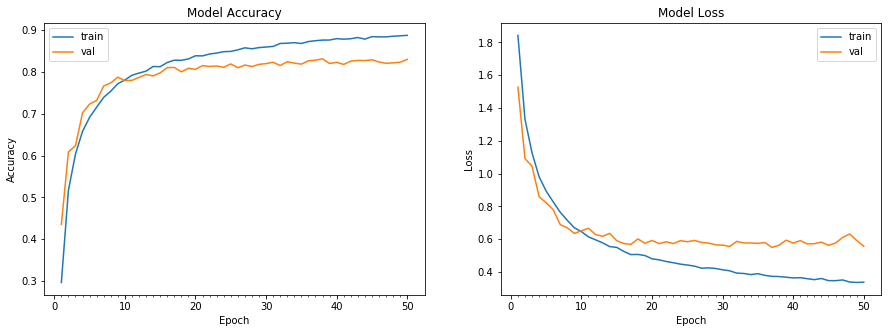

Accuracy on test data is: 82.96


In [0]:
model.load_weights('model.h5')
datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
model.save_weights('model_afterTraining.h5')

## Removing Dense Layers, Using 1X1, Using Proper Droupouts, Get accuracy more than the base accuracy in less number 100 epochs

### Removing the Dense Layer - Reduced the number of parameters used.

1. **Total params: 652,474**
2. Trainable params: 652,474
3. Non-trainable params: 0

###We are getting the validation accuracy = 81.71%
#### After 50 EPOCHS we get the following results:

Model1: loss: 0.1834 || acc: 0.9357 || val_loss: 0.7535 || **val_acc: 0.8171**

In [13]:
########################################
# Define the model
model = Sequential()
########################################

# All shapes are in the form [height, width, num_channels]

# INPUT SIZE : [32, 32, 3] | OUTPUT SIZE : [32, 32, 48] | GRF_of_input : [1, 1]
model.add(Convolution2D(48, (3, 3), padding='same', input_shape=(32, 32, 3))) # 32
model.add(Activation('relu'))

# INPUT SIZE : [32, 32, 48] | OUTPUT SIZE : [30, 30, 48] | GRF_of_input : [3, 3]
model.add(Convolution2D(48, (3, 3))) # 30
model.add(Activation('relu'))

########################################

# INPUT SIZE : [30, 30, 48] | OUTPUT SIZE : [15, 15, 48] | GRF_of_input : [5, 5]
model.add(MaxPooling2D(pool_size=(2, 2))) # 15
model.add(Dropout(0.25))
########################################

# The valid means there is no padding around input or feature map, while same means there are some padding around input or feature map, making the output feature map's size same as the input's]
# INPUT SIZE : [15, 15, 48] | OUTPUT SIZE : [15, 15, 96] | GRF_of_input : [7, 7]
model.add(Convolution2D(96, (3, 3), padding='same')) # 15
model.add(Activation('relu'))

# INPUT SIZE : [15, 15, 96] | OUTPUT SIZE : [13, 13, 96] | GRF_of_input : [11, 11]
model.add(Convolution2D(96, (3, 3))) # 13
model.add(Activation('relu'))
########################################

# INPUT SIZE : [13, 13, 96] | OUTPUT SIZE : [6, 6, 96] | GRF_of_input : [15, 15]
model.add(MaxPooling2D(pool_size=(2, 2))) # 6
model.add(Dropout(0.25))
########################################

# INPUT SIZE : [6, 6, 96] | OUTPUT SIZE : [6, 6, 192] | GRF_of_input : [19, 19]
model.add(Convolution2D(192, (3, 3), padding='same')) # 6
model.add(Activation('relu'))

# INPUT SIZE : [6, 6, 192] | OUTPUT SIZE : [4, 4, 192] | GRF_of_input : [27, 27]
model.add(Convolution2D(192, (3, 3))) # 4
model.add(Activation('relu'))

########################################
# INPUT SIZE : [4, 4, 192] | OUTPUT SIZE : [2, 2, 192] | GRF_of_input : [35, 35]
model.add(MaxPooling2D(pool_size=(2, 2))) # 2
model.add(Dropout(0.25))
########################################

model.add(Convolution2D(num_classes, (2, 2)))
model.add(Flatten())
model.add(Activation('softmax'))

########################################

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing out the model summary
model.summary()

########################################
# saving the model to reload model with initial weights while trying out different optimizations
model.save_weights('model1.h5')
########################################


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_24 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':
W0830 16:29:53.707034 140633003722624 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will

Epoch 1/50
390/390 [==============================] - 21s 55ms/step - loss: 1.6710 - acc: 0.3800 - val_loss: 1.2896 - val_acc: 0.5341
Epoch 2/50
390/390 [==============================] - 20s 51ms/step - loss: 1.2116 - acc: 0.5649 - val_loss: 1.0226 - val_acc: 0.6335
Epoch 3/50
390/390 [==============================] - 20s 50ms/step - loss: 1.0047 - acc: 0.6434 - val_loss: 0.9381 - val_acc: 0.6701
Epoch 4/50
390/390 [==============================] - 20s 51ms/step - loss: 0.8716 - acc: 0.6939 - val_loss: 0.8017 - val_acc: 0.7223
Epoch 5/50
390/390 [==============================] - 20s 51ms/step - loss: 0.7794 - acc: 0.7280 - val_loss: 0.7560 - val_acc: 0.7371
Epoch 6/50
390/390 [==============================] - 20s 51ms/step - loss: 0.7094 - acc: 0.7512 - val_loss: 0.6957 - val_acc: 0.7550
Epoch 7/50
390/390 [==============================] - 20s 51ms/step - loss: 0.6409 - acc: 0.7759 - val_loss: 0.6907 - val_acc: 0.7634
Epoch 8/50
390/390 [==============================] - 20s 51ms

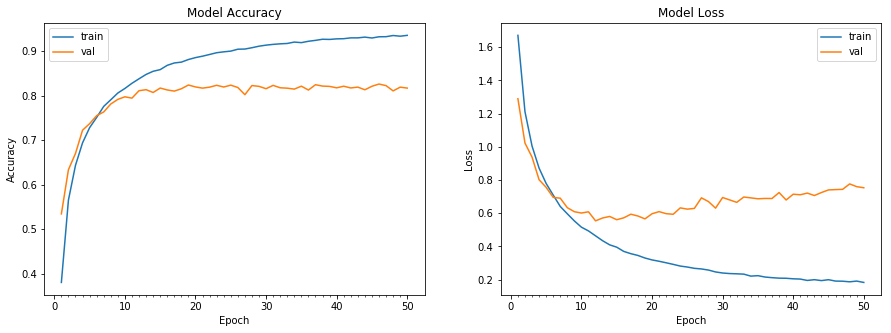

Accuracy on test data is: 81.71


In [0]:
model.load_weights('model1.h5')
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

model.save_weights('model1_afterTraining.h5')

###Fix Kernel Scale Up and Down using 1X1

We have tried two varients:
1. Model2: 1X1 before Max-Pooling: **val_acc = 81.14%**
2. Model3: 1X1 after Max-Pooling: **val_acc = 80.26%**


#### Keeping 1X1 before Max-Pooling - Model 2


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_51 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_52 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 30, 30, 96)        4704      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 96)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 29s 74ms/step - loss: 2.0085 - acc: 0.2234 - val_loss: 1.6544 - val_acc: 0.3687
Epoch 2/50
390/390 [==============================] - 27s 70ms/step - loss: 1.6376 - acc: 0.3817 - val_loss: 1.3796 - val_acc: 0.4825
Epoch 3/50
390/390 [==============================] - 27s 70ms/step - loss: 1.4194 - acc: 0.4825 - val_loss: 1.2480 - val_acc: 0.5558
Epoch 4/50
390/390 [==============================] - 27s 70ms/step - loss: 1.2266 - acc: 0.5599 - val_loss: 1.0618 - val_acc: 0.6201
Epoch 5/50
390/390 [==============================] - 27s 70ms/step - loss: 1.0990 - acc: 0.6115 - val_loss: 0.9670 - val_acc: 0.6556
Epoch 6/50
390/390 [==============================] - 27s 70ms/step - loss: 0.9741 - acc: 0.6570 - val_loss: 0.8888 - val_acc: 0.6888
Epoch 7/50
390/390 [==============================] - 27s 70ms/step - loss: 0.8789 - acc: 0.6922 - val_loss: 0.8046 - val_acc: 0.7179
Epoch 8/50
390/390 [==============================] - 27s 70ms

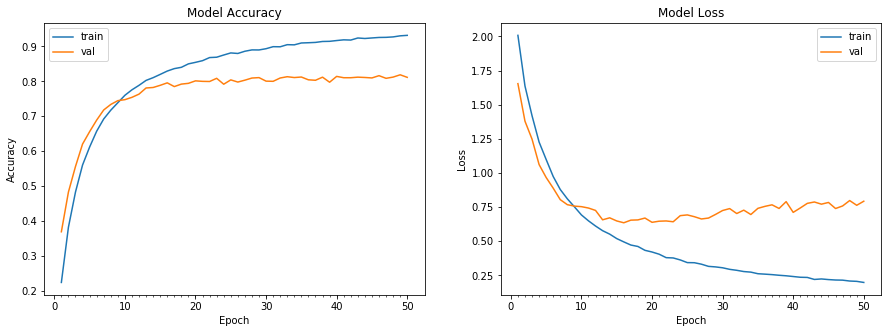

Accuracy on test data is: 81.14


In [23]:
########################################
# Define the model
model = Sequential()
########################################

# All shapes are in the form [height, width, num_channels]

# INPUT SIZE : [32, 32, 3] | OUTPUT SIZE : [32, 32, 48] | GRF_of_input : [1, 1]
model.add(Convolution2D(48, (3, 3), padding='same', input_shape=(32, 32, 3))) # 32
model.add(Activation('relu'))

# INPUT SIZE : [32, 32, 48] | OUTPUT SIZE : [30, 30, 48] | GRF_of_input : [3, 3]
model.add(Convolution2D(48, (3, 3))) # 30
model.add(Activation('relu'))

model.add(Convolution2D(96, (1, 1), activation='relu'))

########################################

# INPUT SIZE : [30, 30, 96] | OUTPUT SIZE : [15, 15, 96] | GRF_of_input : [5, 5]
model.add(MaxPooling2D(pool_size=(2, 2))) # 15
model.add(Dropout(0.25))
########################################

# The valid means there is no padding around input or feature map, while same means there are some padding around input or feature map, making the output feature map's size same as the input's]
# INPUT SIZE : [15, 15, 96] | OUTPUT SIZE : [15, 15, 96] | GRF_of_input : [7, 7]
model.add(Convolution2D(96, (3, 3), padding='same')) # 15
model.add(Activation('relu'))

# INPUT SIZE : [15, 15, 96] | OUTPUT SIZE : [13, 13, 96] | GRF_of_input : [11, 11]
model.add(Convolution2D(96, (3, 3))) # 13
model.add(Activation('relu'))

model.add(Convolution2D(192, (1, 1), activation='relu'))

########################################

# INPUT SIZE : [13, 13, 192] | OUTPUT SIZE : [6, 6, 192] | GRF_of_input : [15, 15]
model.add(MaxPooling2D(pool_size=(2, 2))) # 6
model.add(Dropout(0.25))
########################################

# INPUT SIZE : [6, 6, 192] | OUTPUT SIZE : [6, 6, 192] | GRF_of_input : [19, 19]
model.add(Convolution2D(192, (3, 3), padding='same')) # 6
model.add(Activation('relu'))

# INPUT SIZE : [6, 6, 192] | OUTPUT SIZE : [4, 4, 192] | GRF_of_input : [27, 27]
model.add(Convolution2D(192, (3, 3))) # 4
model.add(Activation('relu'))


model.add(Convolution2D(num_classes, (1, 1), activation='relu'))

########################################
# INPUT SIZE : [4, 4, 10] | OUTPUT SIZE : [2, 2, 10] | GRF_of_input : [35, 35]
model.add(MaxPooling2D(pool_size=(2, 2))) # 2
model.add(Dropout(0.25))
########################################

model.add(Convolution2D(num_classes, (2, 2)))
model.add(Flatten())
model.add(Activation('softmax'))

########################################

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing out the model summary
model.summary()

########################################
# saving the model to reload model with initial weights while trying out different optimizations
model.save_weights('model2.h5')
########################################

########################################################################################################################
model.load_weights('model2.h5')
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
model.save_weights('model2_afterTraining.h5')

########################################################################################################################

#### Keeping 1X1 after Max-Pooling - Model3



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Co

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_31 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 25s 65ms/step - loss: 1.7672 - acc: 0.3352 - val_loss: 1.5207 - val_acc: 0.4550
Epoch 2/50
390/390 [==============================] - 24s 61ms/step - loss: 1.3230 - acc: 0.5203 - val_loss: 1.1670 - val_acc: 0.5771
Epoch 3/50
390/390 [==============================] - 24s 61ms/step - loss: 1.1251 - acc: 0.5970 - val_loss: 1.0161 - val_acc: 0.6376
Epoch 4/50
390/390 [==============================] - 24s 61ms/step - loss: 1.0070 - acc: 0.6435 - val_loss: 0.9383 - val_acc: 0.6712
Epoch 5/50
390/390 [==============================] - 24s 62ms/step - loss: 0.9101 - acc: 0.6751 - val_loss: 0.8926 - val_acc: 0.6872
Epoch 6/50
390/390 [==============================] - 24s 61ms/step - loss: 0.8369 - acc: 0.7045 - val_loss: 0.7899 - val_acc: 0.7192
Epoch 7/50
390/390 [==============================] - 24s 61ms/step - loss: 0.7813 - acc: 0.7245 - val_loss: 0.7543 - val_acc: 0.7382
Epoch 8/50
390/390 [==============================] - 24s 61ms

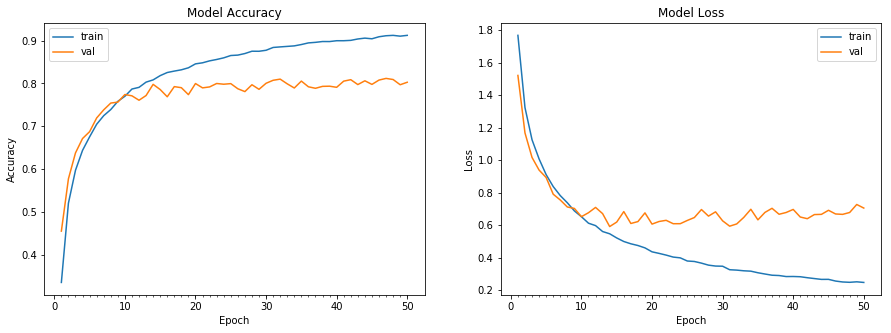

Accuracy on test data is: 80.26


In [0]:
########################################
# Define the model
model = Sequential()
########################################

# All shapes are in the form [height, width, num_channels]

# INPUT SIZE : [32, 32, 3] | OUTPUT SIZE : [32, 32, 48] | GRF_of_input : [1, 1]
model.add(Convolution2D(48, (3, 3), padding='same', input_shape=(32, 32, 3))) # 32
model.add(Activation('relu'))

# INPUT SIZE : [32, 32, 48] | OUTPUT SIZE : [30, 30, 48] | GRF_of_input : [3, 3]
model.add(Convolution2D(48, (3, 3))) # 30
model.add(Activation('relu'))


########################################

# INPUT SIZE : [30, 30, 48] | OUTPUT SIZE : [15, 15, 48] | GRF_of_input : [5, 5]
model.add(MaxPooling2D(pool_size=(2, 2))) # 15
model.add(Dropout(0.25))
########################################

model.add(Convolution2D(96, (1, 1), activation='relu'))


# The valid means there is no padding around input or feature map, while same means there are some padding around input or feature map, making the output feature map's size same as the input's]
# INPUT SIZE : [15, 15, 96] | OUTPUT SIZE : [15, 15, 96] | GRF_of_input : [7, 7]
model.add(Convolution2D(96, (3, 3), padding='same')) # 15
model.add(Activation('relu'))

# INPUT SIZE : [15, 15, 96] | OUTPUT SIZE : [13, 13, 96] | GRF_of_input : [11, 11]
model.add(Convolution2D(96, (3, 3))) # 13
model.add(Activation('relu'))


########################################

# INPUT SIZE : [13, 13, 96] | OUTPUT SIZE : [6, 6, 96] | GRF_of_input : [15, 15]
model.add(MaxPooling2D(pool_size=(2, 2))) # 6
model.add(Dropout(0.25))
########################################

model.add(Convolution2D(192, (1, 1), activation='relu'))

# INPUT SIZE : [6, 6, 192] | OUTPUT SIZE : [6, 6, 192] | GRF_of_input : [19, 19]
model.add(Convolution2D(192, (3, 3), padding='same')) # 6
model.add(Activation('relu'))

# INPUT SIZE : [6, 6, 192] | OUTPUT SIZE : [4, 4, 192] | GRF_of_input : [27, 27]
model.add(Convolution2D(192, (3, 3))) # 4
model.add(Activation('relu'))



########################################
# INPUT SIZE : [4, 4, 192] | OUTPUT SIZE : [2, 2, 192] | GRF_of_input : [35, 35]
model.add(MaxPooling2D(pool_size=(2, 2))) # 2
model.add(Dropout(0.25))
########################################

model.add(Convolution2D(num_classes, (2, 2)))
model.add(Flatten())
model.add(Activation('softmax'))

########################################

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing out the model summary
model.summary()

########################################
# saving the model to reload model with initial weights while trying out different optimizations
model.save_weights('model3.h5')
########################################

########################################################################################################################
model.load_weights('model3.h5')
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
model.save_weights('model3_afterTraining.h5')

########################################################################################################################

### Placing Droupout Layers and Correcting its dropout rate

We have tried 4 varients:
1. Model 4: Reducing the value of Dropout to 0.10: **Validation Accuracy=79.47%**
2. Model 5: Adding Dropout after every layer with 0.10 value: **Validation Accuracy=81.36%**
3. Model 6: Changing the Droupout value - initially 0.10 and the 0.15: **Validation Accuracy=82.94%**
4. Model 7: Adding Dropout after every layer with 0.10 value: **Validation Accuracy=83.09%**

#### Model 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_38 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 22s 55ms/step - loss: 1.6285 - acc: 0.4015 - val_loss: 1.2441 - val_acc: 0.5471
Epoch 2/50
390/390 [==============================] - 20s 51ms/step - loss: 1.1358 - acc: 0.5947 - val_loss: 1.0144 - val_acc: 0.6425
Epoch 3/50
390/390 [==============================] - 20s 52ms/step - loss: 0.9219 - acc: 0.6760 - val_loss: 0.8320 - val_acc: 0.7095
Epoch 4/50
390/390 [==============================] - 20s 51ms/step - loss: 0.7755 - acc: 0.7261 - val_loss: 0.7753 - val_acc: 0.7278
Epoch 5/50
390/390 [==============================] - 20s 51ms/step - loss: 0.6783 - acc: 0.7634 - val_loss: 0.7068 - val_acc: 0.7567
Epoch 6/50
390/390 [==============================] - 20s 51ms/step - loss: 0.5912 - acc: 0.7941 - val_loss: 0.6930 - val_acc: 0.7604
Epoch 7/50
390/390 [==============================] - 20s 51ms/step - loss: 0.5372 - acc: 0.8104 - val_loss: 0.6405 - val_acc: 0.7859
Epoch 8/50
390/390 [==============================] - 20s 51ms

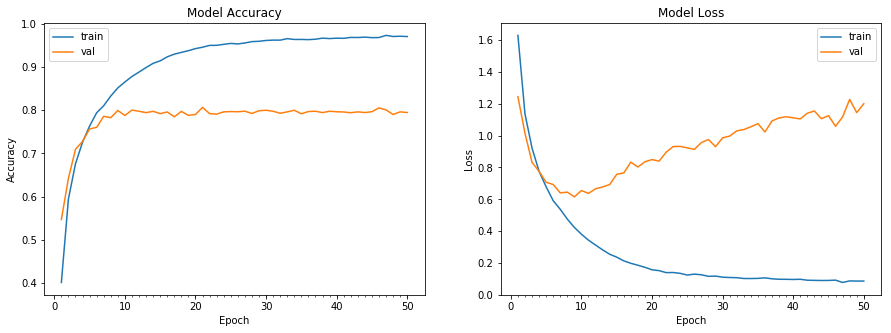

Accuracy on test data is: 79.47


In [0]:
########################################
# Define the model
model = Sequential()
########################################

# All shapes are in the form [height, width, num_channels]

# INPUT SIZE : [32, 32, 3] | OUTPUT SIZE : [32, 32, 48] | GRF_of_input : [1, 1]
model.add(Convolution2D(48, (3, 3), padding='same', input_shape=(32, 32, 3))) # 32
model.add(Activation('relu'))

# INPUT SIZE : [32, 32, 48] | OUTPUT SIZE : [30, 30, 48] | GRF_of_input : [3, 3]
model.add(Convolution2D(48, (3, 3))) # 30
model.add(Activation('relu'))

########################################

# INPUT SIZE : [30, 30, 48] | OUTPUT SIZE : [15, 15, 48] | GRF_of_input : [5, 5]
model.add(MaxPooling2D(pool_size=(2, 2))) # 15
model.add(Dropout(0.10))
########################################

# The valid means there is no padding around input or feature map, while same means there are some padding around input or feature map, making the output feature map's size same as the input's]
# INPUT SIZE : [15, 15, 48] | OUTPUT SIZE : [15, 15, 96] | GRF_of_input : [7, 7]
model.add(Convolution2D(96, (3, 3), padding='same')) # 15
model.add(Activation('relu'))

# INPUT SIZE : [15, 15, 96] | OUTPUT SIZE : [13, 13, 96] | GRF_of_input : [11, 11]
model.add(Convolution2D(96, (3, 3))) # 13
model.add(Activation('relu'))
########################################

# INPUT SIZE : [13, 13, 96] | OUTPUT SIZE : [6, 6, 96] | GRF_of_input : [15, 15]
model.add(MaxPooling2D(pool_size=(2, 2))) # 6
model.add(Dropout(0.10))
########################################

# INPUT SIZE : [6, 6, 96] | OUTPUT SIZE : [6, 6, 192] | GRF_of_input : [19, 19]
model.add(Convolution2D(192, (3, 3), padding='same')) # 6
model.add(Activation('relu'))

# INPUT SIZE : [6, 6, 192] | OUTPUT SIZE : [4, 4, 192] | GRF_of_input : [27, 27]
model.add(Convolution2D(192, (3, 3))) # 4
model.add(Activation('relu'))

########################################
# INPUT SIZE : [4, 4, 192] | OUTPUT SIZE : [2, 2, 192] | GRF_of_input : [35, 35]
model.add(MaxPooling2D(pool_size=(2, 2))) # 2
model.add(Dropout(0.10))
########################################

model.add(Convolution2D(num_classes, (2, 2)))
model.add(Flatten())
model.add(Activation('softmax'))

########################################

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing out the model summary
model.summary()

########################################
# saving the model to reload model with initial weights while trying out different optimizations
model.save_weights('model4.h5')
########################################

########################################################################################################################
model.load_weights('model4.h5')
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
model.save_weights('model4_afterTraining.h5')

########################################################################################################################

#### Model5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3))`
/usr/local/lib/python3.

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_44 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_45 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 28s 71ms/step - loss: 1.6372 - acc: 0.3993 - val_loss: 1.3291 - val_acc: 0.5312
Epoch 2/50
390/390 [==============================] - 26s 66ms/step - loss: 1.1622 - acc: 0.5848 - val_loss: 1.0770 - val_acc: 0.6286
Epoch 3/50
390/390 [==============================] - 25s 64ms/step - loss: 0.9517 - acc: 0.6665 - val_loss: 0.8847 - val_acc: 0.6967
Epoch 4/50
390/390 [==============================] - 25s 64ms/step - loss: 0.8182 - acc: 0.7118 - val_loss: 0.7921 - val_acc: 0.7349
Epoch 5/50
390/390 [==============================] - 25s 64ms/step - loss: 0.7185 - acc: 0.7485 - val_loss: 0.7449 - val_acc: 0.7482
Epoch 6/50
390/390 [==============================] - 25s 64ms/step - loss: 0.6517 - acc: 0.7716 - val_loss: 0.6721 - val_acc: 0.7678
Epoch 7/50
390/390 [==============================] - 25s 65ms/step - loss: 0.5981 - acc: 0.7891 - val_loss: 0.6670 - val_acc: 0.7755
Epoch 8/50
390/390 [==============================] - 25s 64ms

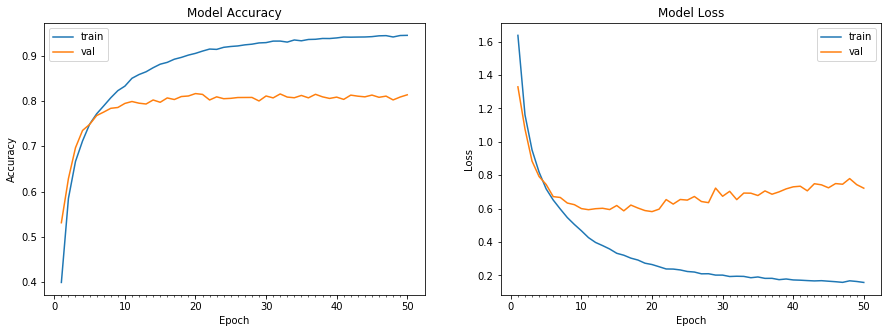

Accuracy on test data is: 81.36


In [0]:
########################################
# Define the model
model = Sequential()
########################################

# All shapes are in the form [height, width, num_channels]

# INPUT SIZE : [32, 32, 3] | OUTPUT SIZE : [32, 32, 48] | GRF_of_input : [1, 1]
model.add(Convolution2D(48, (3, 3), padding='same', input_shape=(32, 32, 3))) # 32
model.add(Activation('relu'))
model.add(Dropout(0.10))


# INPUT SIZE : [32, 32, 48] | OUTPUT SIZE : [30, 30, 48] | GRF_of_input : [3, 3]
model.add(Convolution2D(48, (3, 3))) # 30
model.add(Activation('relu'))
model.add(Dropout(0.10))


########################################

# INPUT SIZE : [30, 30, 48] | OUTPUT SIZE : [15, 15, 48] | GRF_of_input : [5, 5]
model.add(MaxPooling2D(pool_size=(2, 2))) # 15
model.add(Dropout(0.10))
########################################

# The valid means there is no padding around input or feature map, while same means there are some padding around input or feature map, making the output feature map's size same as the input's]
# INPUT SIZE : [15, 15, 48] | OUTPUT SIZE : [15, 15, 96] | GRF_of_input : [7, 7]
model.add(Convolution2D(96, (3, 3), padding='same')) # 15
model.add(Activation('relu'))
model.add(Dropout(0.10))

# INPUT SIZE : [15, 15, 96] | OUTPUT SIZE : [13, 13, 96] | GRF_of_input : [11, 11]
model.add(Convolution2D(96, (3, 3))) # 13
model.add(Activation('relu'))
model.add(Dropout(0.10))
########################################

# INPUT SIZE : [13, 13, 96] | OUTPUT SIZE : [6, 6, 96] | GRF_of_input : [15, 15]
model.add(MaxPooling2D(pool_size=(2, 2))) # 6
model.add(Dropout(0.10))
########################################

# INPUT SIZE : [6, 6, 96] | OUTPUT SIZE : [6, 6, 192] | GRF_of_input : [19, 19]
model.add(Convolution2D(192, (3, 3), padding='same')) # 6
model.add(Activation('relu'))
model.add(Dropout(0.10))

# INPUT SIZE : [6, 6, 192] | OUTPUT SIZE : [4, 4, 192] | GRF_of_input : [27, 27]
model.add(Convolution2D(192, (3, 3))) # 4
model.add(Activation('relu'))
model.add(Dropout(0.10))


########################################
# INPUT SIZE : [4, 4, 192] | OUTPUT SIZE : [2, 2, 192] | GRF_of_input : [35, 35]
model.add(MaxPooling2D(pool_size=(2, 2))) # 2
model.add(Dropout(0.10))
########################################

model.add(Convolution2D(num_classes, (2, 2)))

model.add(Flatten())
model.add(Activation('softmax'))

########################################

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing out the model summary
model.summary()

########################################
# saving the model to reload model with initial weights while trying out different optimizations
model.save_weights('model5.h5')
########################################

########################################################################################################################
model.load_weights('model5.h5')
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
model.save_weights('model5_afterTraining.h5')

########################################################################################################################

#### Model 6

W0831 06:27:40.505221 140003042822016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  import sys
W0831 06:27:40.552994 140003042822016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0831 06:27:40.559879 140003042822016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0831 06:27:40.596013 140003042822016 deprecation_wrapper.py:119] From /usr/local/li

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
W0831 06:27:44.659626 140003042822016 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions fo

Epoch 1/50
390/390 [==============================] - 29s 74ms/step - loss: 1.6697 - acc: 0.3832 - val_loss: 1.3972 - val_acc: 0.5166
Epoch 2/50
390/390 [==============================] - 25s 65ms/step - loss: 1.1768 - acc: 0.5794 - val_loss: 1.0498 - val_acc: 0.6458
Epoch 3/50
390/390 [==============================] - 25s 65ms/step - loss: 0.9502 - acc: 0.6661 - val_loss: 0.9023 - val_acc: 0.6907
Epoch 4/50
390/390 [==============================] - 25s 65ms/step - loss: 0.8181 - acc: 0.7119 - val_loss: 0.7535 - val_acc: 0.7422
Epoch 5/50
390/390 [==============================] - 25s 65ms/step - loss: 0.7325 - acc: 0.7434 - val_loss: 0.8346 - val_acc: 0.7152
Epoch 6/50
390/390 [==============================] - 25s 65ms/step - loss: 0.6599 - acc: 0.7690 - val_loss: 0.6593 - val_acc: 0.7792
Epoch 7/50
390/390 [==============================] - 25s 65ms/step - loss: 0.6151 - acc: 0.7836 - val_loss: 0.6642 - val_acc: 0.7786
Epoch 8/50
390/390 [==============================] - 25s 65ms

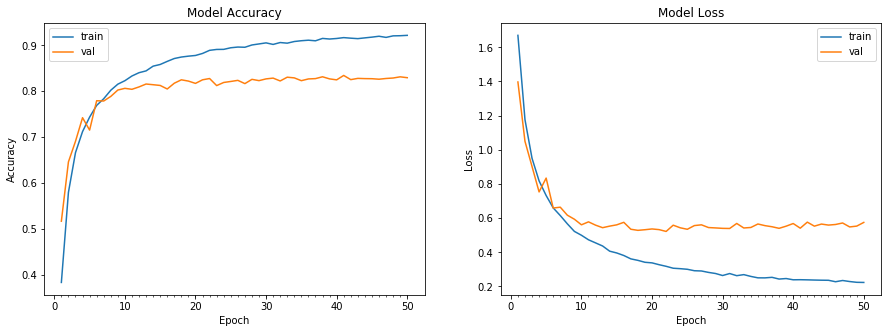

Accuracy on test data is: 82.94


In [0]:
########################################
# Define the model
model = Sequential()
########################################

# All shapes are in the form [height, width, num_channels]

# INPUT SIZE : [32, 32, 3] | OUTPUT SIZE : [32, 32, 48] | GRF_of_input : [1, 1]
model.add(Convolution2D(48, (3, 3), padding='same', input_shape=(32, 32, 3))) # 32
model.add(Activation('relu'))
model.add(Dropout(0.10))


# INPUT SIZE : [32, 32, 48] | OUTPUT SIZE : [30, 30, 48] | GRF_of_input : [3, 3]
model.add(Convolution2D(48, (3, 3))) # 30
model.add(Activation('relu'))
model.add(Dropout(0.10))


########################################

# INPUT SIZE : [30, 30, 48] | OUTPUT SIZE : [15, 15, 48] | GRF_of_input : [5, 5]
model.add(MaxPooling2D(pool_size=(2, 2))) # 15
model.add(Dropout(0.15))
########################################

# The valid means there is no padding around input or feature map, while same means there are some padding around input or feature map, making the output feature map's size same as the input's]
# INPUT SIZE : [15, 15, 48] | OUTPUT SIZE : [15, 15, 96] | GRF_of_input : [7, 7]
model.add(Convolution2D(96, (3, 3), padding='same')) # 15
model.add(Activation('relu'))
model.add(Dropout(0.15))

# INPUT SIZE : [15, 15, 96] | OUTPUT SIZE : [13, 13, 96] | GRF_of_input : [11, 11]
model.add(Convolution2D(96, (3, 3))) # 13
model.add(Activation('relu'))
model.add(Dropout(0.15))
########################################

# INPUT SIZE : [13, 13, 96] | OUTPUT SIZE : [6, 6, 96] | GRF_of_input : [15, 15]
model.add(MaxPooling2D(pool_size=(2, 2))) # 6
model.add(Dropout(0.15))
########################################

# INPUT SIZE : [6, 6, 96] | OUTPUT SIZE : [6, 6, 192] | GRF_of_input : [19, 19]
model.add(Convolution2D(192, (3, 3), padding='same')) # 6
model.add(Activation('relu'))
model.add(Dropout(0.15))

# INPUT SIZE : [6, 6, 192] | OUTPUT SIZE : [4, 4, 192] | GRF_of_input : [27, 27]
model.add(Convolution2D(192, (3, 3))) # 4
model.add(Activation('relu'))
model.add(Dropout(0.15))


########################################
# INPUT SIZE : [4, 4, 192] | OUTPUT SIZE : [2, 2, 192] | GRF_of_input : [35, 35]
model.add(MaxPooling2D(pool_size=(2, 2))) # 2
model.add(Dropout(0.15))
########################################

model.add(Convolution2D(num_classes, (2, 2)))

model.add(Flatten())
model.add(Activation('softmax'))

########################################

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing out the model summary
model.summary()

########################################
# saving the model to reload model with initial weights while trying out different optimizations
model.save_weights('model6.h5')
########################################

########################################################################################################################
model.load_weights('model6.h5')
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
model.save_weights('model6_afterTraining.h5')

########################################################################################################################

#### Model 7

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3))`
/usr/local/lib/python3.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_9 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 27s 68ms/step - loss: 1.7745 - acc: 0.3481 - val_loss: 1.4287 - val_acc: 0.5239
Epoch 2/50
390/390 [==============================] - 25s 65ms/step - loss: 1.3437 - acc: 0.5191 - val_loss: 1.1939 - val_acc: 0.6124
Epoch 3/50
390/390 [==============================] - 25s 65ms/step - loss: 1.1625 - acc: 0.5893 - val_loss: 1.0100 - val_acc: 0.6815
Epoch 4/50
390/390 [==============================] - 25s 65ms/step - loss: 1.0339 - acc: 0.6332 - val_loss: 0.8794 - val_acc: 0.7035
Epoch 5/50
390/390 [==============================] - 25s 65ms/step - loss: 0.9324 - acc: 0.6644 - val_loss: 0.7763 - val_acc: 0.7383
Epoch 6/50
390/390 [==============================] - 25s 65ms/step - loss: 0.8662 - acc: 0.6877 - val_loss: 0.7231 - val_acc: 0.7688
Epoch 7/50
390/390 [==============================] - 25s 65ms/step - loss: 0.8063 - acc: 0.7114 - val_loss: 0.6852 - val_acc: 0.7798
Epoch 8/50
390/390 [==============================] - 25s 65ms

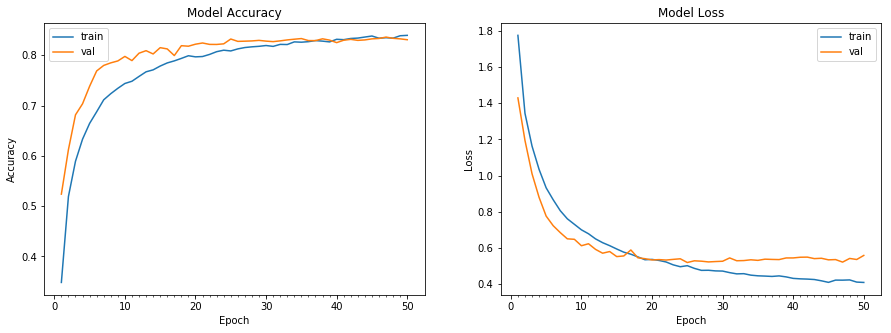

Accuracy on test data is: 83.09


In [0]:
########################################
# Define the model
model = Sequential()
########################################

# All shapes are in the form [height, width, num_channels]

# INPUT SIZE : [32, 32, 3] | OUTPUT SIZE : [32, 32, 48] | GRF_of_input : [1, 1]
model.add(Convolution2D(48, (3, 3), padding='same', input_shape=(32, 32, 3))) # 32
model.add(Activation('relu'))
model.add(Dropout(0.15))


# INPUT SIZE : [32, 32, 48] | OUTPUT SIZE : [30, 30, 48] | GRF_of_input : [3, 3]
model.add(Convolution2D(48, (3, 3))) # 30
model.add(Activation('relu'))
model.add(Dropout(0.15))


########################################

# INPUT SIZE : [30, 30, 48] | OUTPUT SIZE : [15, 15, 48] | GRF_of_input : [5, 5]
model.add(MaxPooling2D(pool_size=(2, 2))) # 15
model.add(Dropout(0.15))
########################################

# The valid means there is no padding around input or feature map, while same means there are some padding around input or feature map, making the output feature map's size same as the input's]
# INPUT SIZE : [15, 15, 48] | OUTPUT SIZE : [15, 15, 96] | GRF_of_input : [7, 7]
model.add(Convolution2D(96, (3, 3), padding='same')) # 15
model.add(Activation('relu'))
model.add(Dropout(0.15))

# INPUT SIZE : [15, 15, 96] | OUTPUT SIZE : [13, 13, 96] | GRF_of_input : [11, 11]
model.add(Convolution2D(96, (3, 3))) # 13
model.add(Activation('relu'))
model.add(Dropout(0.15))
########################################

# INPUT SIZE : [13, 13, 96] | OUTPUT SIZE : [6, 6, 96] | GRF_of_input : [15, 15]
model.add(MaxPooling2D(pool_size=(2, 2))) # 6
model.add(Dropout(0.15))
########################################

# INPUT SIZE : [6, 6, 96] | OUTPUT SIZE : [6, 6, 192] | GRF_of_input : [19, 19]
model.add(Convolution2D(192, (3, 3), padding='same')) # 6
model.add(Activation('relu'))
model.add(Dropout(0.15))

# INPUT SIZE : [6, 6, 192] | OUTPUT SIZE : [4, 4, 192] | GRF_of_input : [27, 27]
model.add(Convolution2D(192, (3, 3))) # 4
model.add(Activation('relu'))
model.add(Dropout(0.15))


########################################
# INPUT SIZE : [4, 4, 192] | OUTPUT SIZE : [2, 2, 192] | GRF_of_input : [35, 35]
model.add(MaxPooling2D(pool_size=(2, 2))) # 2
model.add(Dropout(0.15))
########################################

model.add(Convolution2D(num_classes, (2, 2)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Activation('softmax'))

########################################

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing out the model summary
model.summary()

########################################
# saving the model to reload model with initial weights while trying out different optimizations
model.save_weights('model7.h5')
########################################

########################################################################################################################
model.load_weights('model7.h5')
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
model.save_weights('model7_afterTraining.h5')

########################################################################################################################

### So finally we were able to cross the Validation Accuracy of the base model which was 82.94% 
## and our current Validation Accuracy is : 83.09% 
> **Model 7**:
1. Using Dropout of 0.15 after every layer
2. No Dense Layer Used
3. No 1X1 Convolution Used